In [1]:
from ldm.models.autoencoder import AutoencoderKL
from ldm.util import instantiate_from_config
import torch
import matplotlib.pyplot as plt
from einops import rearrange
import numpy as np

In [4]:
device = 'cuda:0'

In [28]:
ddconfig = {
  'double_z': True,
  'z_channels': 4,
  'resolution': 256,
  'in_channels': 3,
  'out_ch': 3,
  'ch': 128,
  'ch_mult': [ 1,2,4,4 ],  # num_down = len(ch_mult)-1
  'num_res_blocks': 2,
  'attn_resolutions': [ ],
  'dropout': 0.0
}

lossconfig = {
    'target': "torch.nn.Identity"
}

ckpt_path = "models/first_stage_models/kl-f8/model.ckpt"

vae = AutoencoderKL(
                 ddconfig=ddconfig,
                 lossconfig=lossconfig,
                 embed_dim=4,
                 ckpt_path=ckpt_path,
                 ignore_keys=[],
                 image_key="image",
                 colorize_nlabels=None,
                 monitor=None)
vae = vae.to('cuda:0')

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Restored from models/first_stage_models/kl-f8/model.ckpt


In [15]:
ddconfig = {
  'double_z': True,
  'z_channels': 3,
  'resolution': 256,
  'in_channels': 3,
  'out_ch': 3,
  'ch': 128,
  'ch_mult': [ 1,2, 4],  # num_down = len(ch_mult)-1
  'num_res_blocks': 2,
  'attn_resolutions': [ ],
  'dropout': 0.0
}

lossconfig = {
    'target': "torch.nn.Identity"
}

ckpt_path = "models/first_stage_models/kl-f4/model.ckpt"

vae2 = AutoencoderKL(
                 ddconfig=ddconfig,
                 lossconfig=lossconfig,
                 embed_dim=3,
                 ckpt_path=ckpt_path,
                 ignore_keys=[],
                 image_key="image",
                 colorize_nlabels=None,
                 monitor=None)
vae2 = vae2.to('cuda:0')

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels
Restored from models/first_stage_models/kl-f4/model.ckpt


In [19]:
from deepfashion import DeepFashionKeypoint
pickle_file= '/home/soon/github/stable-diffusion-finetune/data/deepfashion/deepfashion_1.pickle'
folder= '/home/soon/datasets/deepfashion/img_256'

dl = iter(DeepFashionKeypoint(pickle_file, folder, False))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


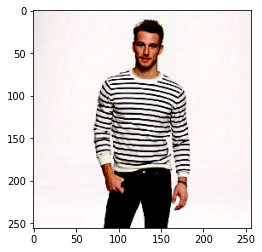

In [23]:
data = next(dl)
plt.imshow(data['image'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


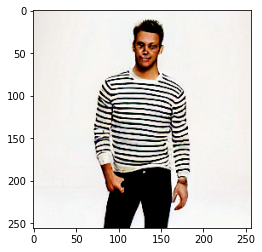

In [24]:
image_in = torch.unsqueeze(rearrange(data['image'], 'h w c -> c h w'),0)
dec, posterior = vae.forward(image_in.to(device), True)
plt.imshow(np.array(rearrange(dec.squeeze(), 'c h w -> h w c').detach().cpu()))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


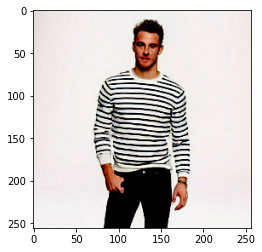

In [25]:
image_in = torch.unsqueeze(rearrange(data['image'], 'h w c -> c h w'),0)
dec, posterior = vae2.forward(image_in.to(device), True)
plt.imshow(np.array(rearrange(dec.squeeze(), 'c h w -> h w c').detach().cpu()))